In [4]:
from sklearn.decomposition import NMF
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("../src/sonar_rocks_mines.csv")
X = df.iloc[:,0:len(df.columns)-1].values
y = df.iloc[:,len(df.columns)-1].values

In [6]:
nmf = NMF(n_components=2)
W = nmf.fit_transform(X)
H = nmf.components_

/opt/miniconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/opt/miniconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [8]:
S = np.dot(W,H)
np.shape(S)

(207, 60)

In [10]:
np.shape(X)

(207, 60)

In [11]:
import matplotlib.pyplot as plt

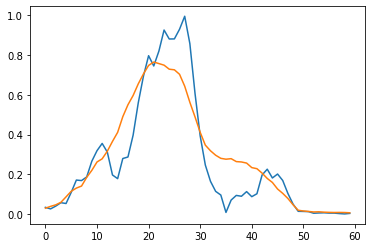

In [21]:
plt.plot(X[200,:])
plt.plot(S[200,:])

In [23]:
dummies = pd.get_dummies(y)
y_ = dummies['M'].values

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(S, y_, test_size = 0.3, random_state = 42)

model = SVC()
param_grid = [{'C': [1,10,100], 
               'kernel': ['linear','poly','rbf'],
               'gamma': ['scale','auto']
              }]
clf = GridSearchCV(model, param_grid, cv = 10, scoring='accuracy')
clf.fit(X_train, y_train)

print(clf.best_params_)
print(clf.best_score_)

{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
0.6047619047619047


`NMFを行ったらXマトリクスをW.Hマトリックスに交換出来ます。精度が悪くなる、結果はダメ`

In [1]:
N = [n for n in range(0,np.size(X,1))]
for i in range(0,90):
    plt.fill_between(N,X[i,:],color="green",alpha=0.5)
for i in range(0,10):
    plt.fill_between(N,X[len(X)-(i+1),:],color="orange",alpha=0.5)

NameError: name 'np' is not defined

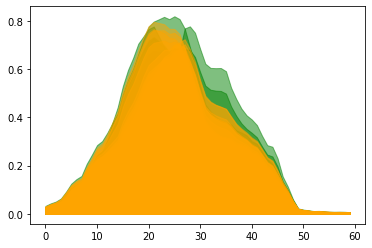

In [32]:
N = [n for n in range(0,np.size(X,1))]
for i in range(0,10):
    plt.fill_between(N,S[i,:],color="green",alpha=0.5)
for i in range(0,10):
    plt.fill_between(N,S[len(S)-(i+1),:],color="orange",alpha=0.5)

## parameter tuning : n_components 

In [46]:
component = []
best_score = []
for i in range(2,21):
    nmf = NMF(n_components=i)
    W = nmf.fit_transform(X)
    H = nmf.components_
    S = np.dot(W,H)
    dummies = pd.get_dummies(y)
    y_ = dummies['M'].values

    from sklearn.model_selection import GridSearchCV
    from sklearn.svm import SVC
    # from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(S, y_, test_size = 0.3, random_state = 42)

    model = SVC()
    param_grid = [{'C': [1,10,100], 
                   'kernel': ['linear','poly','rbf'],
                   'gamma': ['scale','auto']
                  }]
    clf = GridSearchCV(model, param_grid, cv = 10, scoring='accuracy')
    clf.fit(X_train, y_train)

    # print(clf.best_params_)
    # print(clf.best_score_)
    component.append(i)
    best_score.append(clf.best_score_)


/opt/miniconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/opt/miniconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
/opt/miniconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/opt/miniconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of it

Text(0.5, 0, 'Components')

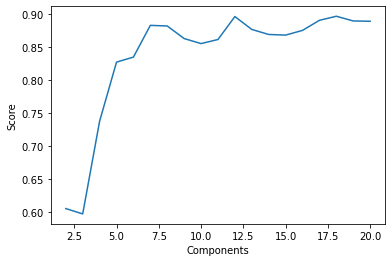

In [48]:
plt.plot(component,best_score)
plt.ylabel("Score")
plt.xlabel("Components")